https://scikit-learn.org/stable/datasets/index.html#boston-house-prices-dataset

In [ ]:
from sklearn.datasets import load_boston

df = load_boson() # load_boston` has been removed from scikit-learn since version 1.2. 오류

ImportError: ignored

## 라이브러리

In [ ]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## 데이터 준비

In [ ]:
housing = pd.read_csv("./train.csv")
housing.head()

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,TRAIN_000,0.04819,80.0,3.64,0.0,0.392,6.108,32.0,9.2203,1.0,315.0,16.4,392.89,6.57,21.9
1,TRAIN_001,1.42502,0.0,19.58,0.0,0.871,6.510,100.0,1.7659,5.0,403.0,14.7,364.31,7.39,23.3
2,TRAIN_002,0.01778,95.0,1.47,0.0,0.403,7.135,13.9,7.6534,3.0,402.0,17.0,384.30,4.45,32.9
3,TRAIN_003,9.51363,0.0,18.10,0.0,0.713,6.728,94.1,2.4961,24.0,666.0,20.2,6.68,18.71,14.9
4,TRAIN_004,1.65660,0.0,19.58,0.0,0.871,6.122,97.3,1.6180,5.0,403.0,14.7,372.80,14.10,21.5


- CRIM: 도시별 1인당 범죄율
- ZN: 25,000 피트를 초과하는 주거용 토지의 비율
- INDUS: 비상업 면적의 비율
- CHAS: 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)
- NOX: 일산화질소 농도
- RM: 주택당 평균 방의 개수
- AGE: 1940년 이전에 건축된 자가주택의 비율
- DIS: 5개의 보스턴 고용 센터와의 거리
- 0RAD: 고속도로 접근성 지수
- TAX: 10,000달러당 재산세율
- PTRATIO: 도시별 교사와 학생 수 비율
- B: 마을의 흑인 거주 비율
- LSTAT: 하위 계층의 비율
- MEDV: 본인 소유의 주택 가격(중앙값, 단위: 천달러)

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455 entries, 0 to 454
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       455 non-null    object 
 1   CRIM     455 non-null    float64
 2   ZN       455 non-null    float64
 3   INDUS    455 non-null    float64
 4   CHAS     455 non-null    float64
 5   NOX      455 non-null    float64
 6   RM       455 non-null    float64
 7   AGE      455 non-null    float64
 8   DIS      455 non-null    float64
 9   RAD      455 non-null    float64
 10  TAX      455 non-null    float64
 11  PTRATIO  455 non-null    float64
 12  B        455 non-null    float64
 13  LSTAT    455 non-null    float64
 14  MEDV     455 non-null    float64
dtypes: float64(14), object(1)
memory usage: 53.4+ KB


결측값 없음

In [ ]:
  housing.isnull().sum()

ID         0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [ ]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,3.659998,11.165934,11.092747,0.065934,0.555160,6.285352,68.320440,3.788439,9.551648,407.892308,18.453846,356.285714,12.604967,22.574725
std,8.888075,22.953757,6.821697,0.248440,0.116524,0.699346,27.893807,2.082031,8.718624,169.446805,2.149137,92.664335,7.090388,9.120759
min,0.006320,0.000000,0.460000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.079230,0.000000,5.160000,0.000000,0.449000,5.881000,44.700000,2.100350,4.000000,278.000000,17.400000,375.990000,6.970000,17.100000
50%,0.245220,0.000000,9.690000,0.000000,0.538000,6.208000,76.700000,3.199200,5.000000,330.000000,19.000000,391.700000,11.280000,21.200000
75%,3.685665,12.500000,18.100000,0.000000,0.624000,6.627000,93.850000,5.164950,24.000000,666.000000,20.200000,396.375000,16.695000,25.100000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000,50.000000


In [ ]:
housing

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,TRAIN_000,0.04819,80.0,3.64,0.0,0.392,6.108,32.0,9.2203,1.0,315.0,16.4,392.89,6.57,21.9
1,TRAIN_001,1.42502,0.0,19.58,0.0,0.871,6.510,100.0,1.7659,5.0,403.0,14.7,364.31,7.39,23.3
2,TRAIN_002,0.01778,95.0,1.47,0.0,0.403,7.135,13.9,7.6534,3.0,402.0,17.0,384.30,4.45,32.9
3,TRAIN_003,9.51363,0.0,18.10,0.0,0.713,6.728,94.1,2.4961,24.0,666.0,20.2,6.68,18.71,14.9
4,TRAIN_004,1.65660,0.0,19.58,0.0,0.871,6.122,97.3,1.6180,5.0,403.0,14.7,372.80,14.10,21.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,TRAIN_450,0.33983,22.0,5.86,0.0,0.431,6.108,34.9,8.0555,7.0,330.0,19.1,390.18,9.16,24.3
451,TRAIN_451,3.83684,0.0,18.10,0.0,0.770,6.251,91.1,2.2955,24.0,666.0,20.2,350.65,14.19,19.9
452,TRAIN_452,0.20746,0.0,27.74,0.0,0.609,5.093,98.0,1.8226,4.0,711.0,20.1,318.43,29.68,8.1
453,TRAIN_453,0.09299,0.0,25.65,0.0,0.581,5.961,92.9,2.0869,2.0,188.0,19.1,378.09,17.93,20.5


In [ ]:
housing.columns

Index(['ID', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

## 데이터 나누기

In [ ]:
x = housing.drop(columns=['ID', 'MEDV'])
y = housing['MEDV']

In [ ]:
test = pd.read_csv("./test.csv")
test = test.drop(columns=['ID'])

스케일링

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
inputs_scaled = scaler.fit_transform(x)
scaler_target = MinMaxScaler()
targets_scaled = scaler_target.fit_transform(y.values.reshape((-1,1)))
targets_scaled = targets_scaled.reshape((-1,))

## 학습

#### 초기모델
- 2층 신경망
- 가중치 13->10->1
- relu함수 사용
- 학습률 0.05
- 학습 횟수 800회
- 배치 사이즈 25

In [ ]:
class base_Model(tf.keras.Model):
  def __init__(self):
    super(base_Model,self).__init__()
    initializer = tf.keras.initializers.glorot_uniform()
    self.b1 = tf.Variable(initializer([10]))
    self.w1 = tf.Variable(initializer([13,10]))
    self.b2 = tf.Variable(initializer([1]))
    self.w2 = tf.Variable(initializer([10,1]))
    
  def call(self,inputs):
    z = self.b1 + inputs @ self.w1
    z = tf.keras.activations.relu(z)
    y = self.b2 + z @ self.w2
    return tf.squeeze(y)

def loss(target, y):
  return tf.reduce_mean((target-y)**2)

In [ ]:
lr = 0.05
opt = tf.keras.optimizers.SGD(learning_rate=lr)
model = base_Model()
model.compile(optimizer=opt, loss=loss)
history = model.fit(x, y, epochs=800, batch_size=25)

Epoch 1/800
19/19 [==============================] - 25s 2ms/step - loss: 44216812866371584.0000
Epoch 2/800
19/19 [==============================] - 0s 4ms/step - loss: 56961747910656.0000
Epoch 3/800
19/19 [==============================] - 0s 3ms/step - loss: 1039437987840.0000
Epoch 4/800
19/19 [==============================] - 0s 3ms/step - loss: 18967615488.0000
Epoch 5/800
19/19 [==============================] - 0s 3ms/step - loss: 346110208.0000
Epoch 6/800
19/19 [==============================] - 0s 3ms/step - loss: 6316328.5000
Epoch 7/800
19/19 [==============================] - 0s 2ms/step - loss: 115529.9062
Epoch 8/800
19/19 [==============================] - 0s 4ms/step - loss: 2237.9468
Epoch 9/800
19/19 [==============================] - 0s 3ms/step - loss: 122.0014
Epoch 10/800
19/19 [==============================] - 0s 2ms/step - loss: 84.3612
Epoch 11/800
19/19 [==============================] - 0s 2ms/step - loss: 83.2240
Epoch 12/800
19/19 [====================

최종 손실률 83.5827

<Axes: >

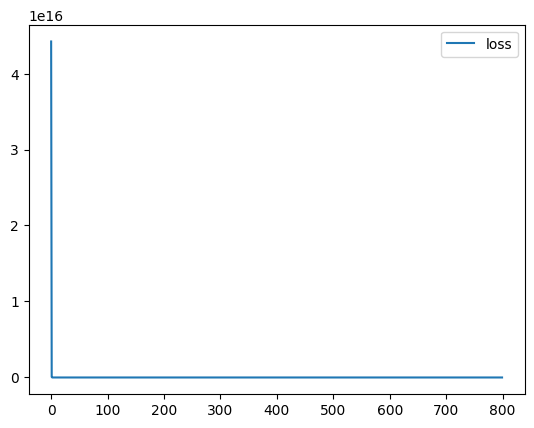

In [ ]:
pd.DataFrame(history.history).plot()

#### 2차모델
- 4층 신경망
- 가중치 13->26->52->26->1
- sigmoid함수 사용
- 학습률 0.1
- 학습 횟수 100회
- 배치 사이즈 0

In [ ]:
class Model(tf.keras.Model):
    def __init__(self):
        super(Model,self).__init__()
        initializer = tf.keras.initializers.glorot_uniform()
        self.w1 = tf.Variable(initializer([13,26]))
        self.b1 = tf.Variable(initializer([26]))
        self.w2 = tf.Variable(initializer([26,52]))
        self.b2 = tf.Variable(initializer([52]))
        self.w3 = tf.Variable(initializer([52,26]))
        self.b3 = tf.Variable(initializer([26]))
        self.w4 = tf.Variable(initializer([26,1]))
        self.b4 = tf.Variable(initializer([1]))

    def call(self,inputs):
        y = self.b1 + inputs @ self.w1
        y = tf.keras.activations.sigmoid(y)
        y = self.b2 + y @ self.w2
        y = tf.keras.activations.sigmoid(y)
        y = self.b3 + y @ self.w3
        y = tf.keras.activations.sigmoid(y)
        y = self.b4 + y @ self.w4
        y = tf.keras.activations.sigmoid(y)
        return tf.squeeze(y)

In [ ]:
def loss(target,y):
    return tf.reduce_mean((target-y)**2)

In [ ]:
model = Model()
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), loss = loss)
history = model.fit(x, y,epochs=100)

Epoch 1/100
15/15 [==============================] - 1s 3ms/step - loss: 548.9366
Epoch 2/100
15/15 [==============================] - 0s 4ms/step - loss: 548.4868
Epoch 3/100
15/15 [==============================] - 0s 3ms/step - loss: 548.4840
Epoch 4/100
15/15 [==============================] - 0s 3ms/step - loss: 548.4823
Epoch 5/100
15/15 [==============================] - 0s 3ms/step - loss: 548.4811
Epoch 6/100
15/15 [==============================] - 0s 3ms/step - loss: 548.4802
Epoch 7/100
15/15 [==============================] - 0s 3ms/step - loss: 548.4795
Epoch 8/100
15/15 [==============================] - 0s 3ms/step - loss: 548.4789
Epoch 9/100
15/15 [==============================] - 0s 3ms/step - loss: 548.4784
Epoch 10/100
15/15 [==============================] - 0s 5ms/step - loss: 548.4781
Epoch 11/100
15/15 [==============================] - 0s 4ms/step - loss: 548.4777
Epoch 12/100
15/15 [==============================] - 0s 3ms/step - loss: 548.4775
Epoch 13/100


초기 모델을 잡고 모델 층수를 늘리고 활성화 함수를 바꿨더니 손실값이 몇배가 늘었다.

최종 손실값 : 548.4745

<Axes: >

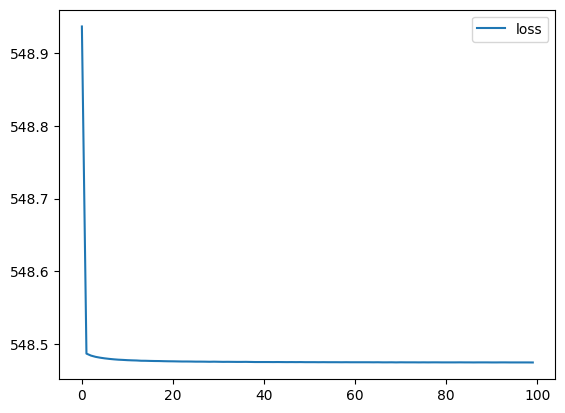

In [ ]:
pd.DataFrame(history.history).plot()

그래프도 상당히 이상한 모양으로 나왔다.

#### 3차모델
- 4층 신경망
- 가중치 13->26->52->26->1
- sigmoid 함수 사용 <-> relu함수로 변경
- 학습률 0.1
- 학습 횟수 100회
- 배치 사이즈 0

In [ ]:
 class Model(tf.keras.Model):
    def __init__(self):
        super(Model,self).__init__()
        initializer = tf.keras.initializers.glorot_uniform()
        self.w1 = tf.Variable(initializer([13,26]))
        self.b1 = tf.Variable(initializer([26]))
        self.w2 = tf.Variable(initializer([26,52]))
        self.b2 = tf.Variable(initializer([52]))
        self.w3 = tf.Variable(initializer([52,26]))
        self.b3 = tf.Variable(initializer([26]))
        self.w4 = tf.Variable(initializer([26,1]))
        self.b4 = tf.Variable(initializer([1]))

    def call(self,inputs):
        y = self.b1 + inputs @ self.w1
        y = tf.keras.activations.relu(y)
        y = self.b2 + y @ self.w2
        y = tf.keras.activations.relu(y)
        y = self.b3 + y @ self.w3
        y = tf.keras.activations.relu(y)
        y = self.b4 + y @ self.w4
        y = tf.keras.activations.relu(y)
        return tf.squeeze(y)

def loss(target,y):
  return tf.reduce_mean((target-y)**2)

In [ ]:
model = Model()
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), loss = loss)
history = model.fit(x, y,epochs=100)

Epoch 1/100
15/15 [==============================] - 1s 2ms/step - loss: 592.6236
Epoch 2/100
15/15 [==============================] - 0s 2ms/step - loss: 592.6236
Epoch 3/100
15/15 [==============================] - 0s 2ms/step - loss: 592.6236
Epoch 4/100
15/15 [==============================] - 0s 3ms/step - loss: 592.6235
Epoch 5/100
15/15 [==============================] - 0s 3ms/step - loss: 592.6236
Epoch 6/100
15/15 [==============================] - 0s 2ms/step - loss: 592.6235
Epoch 7/100
15/15 [==============================] - 0s 3ms/step - loss: 592.6236
Epoch 8/100
15/15 [==============================] - 0s 2ms/step - loss: 592.6236
Epoch 9/100
15/15 [==============================] - 0s 3ms/step - loss: 592.6236
Epoch 10/100
15/15 [==============================] - 0s 3ms/step - loss: 592.6236
Epoch 11/100
15/15 [==============================] - 0s 2ms/step - loss: 592.6236
Epoch 12/100
15/15 [==============================] - 0s 3ms/step - loss: 592.6236
Epoch 13/100


<Axes: >

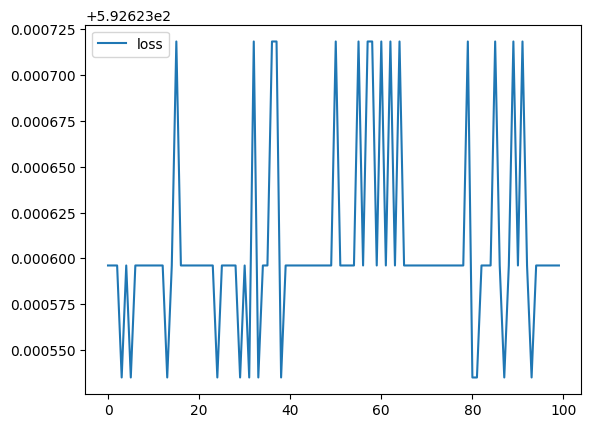

In [ ]:
pd.DataFrame(history.history).plot()

활성화 함수의 문제인 줄 알고 relu함수로 변환했지만 결과는 그래프만 나아졌을뿐 손실 값에는 큰 차이를 보이지 못했다.

최종 손실값: 592.6237

#### 4차모델
- 4층 신경망
- 가중치 13->26->52->26->1
- relu함수
- 학습률 0.05
- 학습 횟수 100회
- 배치 사이즈 25

In [ ]:
 class Model(tf.keras.Model):
    def __init__(self):
        super(Model,self).__init__()
        initializer = tf.keras.initializers.glorot_uniform()
        self.w1 = tf.Variable(initializer([13,26]))
        self.b1 = tf.Variable(initializer([26]))
        self.w2 = tf.Variable(initializer([26,52]))
        self.b2 = tf.Variable(initializer([52]))
        self.w3 = tf.Variable(initializer([52,26]))
        self.b3 = tf.Variable(initializer([26]))
        self.w4 = tf.Variable(initializer([26,1]))
        self.b4 = tf.Variable(initializer([1]))

    def call(self,inputs):
        y = self.b1 + inputs @ self.w1
        y = tf.keras.activations.relu(y)
        y = self.b2 + y @ self.w2
        y = tf.keras.activations.relu(y)
        y = self.b3 + y @ self.w3
        y = tf.keras.activations.relu(y)
        y = self.b4 + y @ self.w4
        y = tf.keras.activations.relu(y)
        return tf.squeeze(y)

def loss(target,y):
  return tf.reduce_mean((target-y)**2)

In [ ]:
lr = 0.05
opt = tf.keras.optimizers.SGD(learning_rate=lr)
model = Model()
model.compile(optimizer=opt, loss=loss)
history = model.fit(x, y, epochs=100, batch_size=25)

Epoch 1/100
19/19 [==============================] - 1s 4ms/step - loss: 592.6237
Epoch 2/100
19/19 [==============================] - 0s 3ms/step - loss: 592.6237
Epoch 3/100
19/19 [==============================] - 0s 2ms/step - loss: 592.6235
Epoch 4/100
19/19 [==============================] - 0s 3ms/step - loss: 592.6235
Epoch 5/100
19/19 [==============================] - 0s 3ms/step - loss: 592.6236
Epoch 6/100
19/19 [==============================] - 0s 3ms/step - loss: 592.6236
Epoch 7/100
19/19 [==============================] - 0s 4ms/step - loss: 592.6236
Epoch 8/100
19/19 [==============================] - 0s 2ms/step - loss: 592.6237
Epoch 9/100
19/19 [==============================] - 0s 2ms/step - loss: 592.6237
Epoch 10/100
19/19 [==============================] - 0s 3ms/step - loss: 592.6236
Epoch 11/100
19/19 [==============================] - 0s 3ms/step - loss: 592.6235
Epoch 12/100
19/19 [==============================] - 0s 3ms/step - loss: 592.6236
Epoch 13/100


학습률을 낮추고 배치 사이즈를 추가했는데 똑같았다.

최종 손실값 : 592.6236

결과값이 너무 변화가 없어 스케일링을 했다

In [ ]:
model = Model()
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), loss = loss)
history = model.fit(inputs_scaled,targets_scaled,epochs=100)

Epoch 1/100
15/15 [==============================] - 1s 3ms/step - loss: 0.1772
Epoch 2/100
15/15 [==============================] - 0s 3ms/step - loss: 0.1935
Epoch 3/100
15/15 [==============================] - 0s 2ms/step - loss: 0.1935
Epoch 4/100
15/15 [==============================] - 0s 2ms/step - loss: 0.1935
Epoch 5/100
15/15 [==============================] - 0s 2ms/step - loss: 0.1935
Epoch 6/100
15/15 [==============================] - 0s 2ms/step - loss: 0.1935
Epoch 7/100
15/15 [==============================] - 0s 2ms/step - loss: 0.1935
Epoch 8/100
15/15 [==============================] - 0s 4ms/step - loss: 0.1935
Epoch 9/100
15/15 [==============================] - 0s 2ms/step - loss: 0.1935
Epoch 10/100
15/15 [==============================] - 0s 3ms/step - loss: 0.1935
Epoch 11/100
15/15 [==============================] - 0s 2ms/step - loss: 0.1935
Epoch 12/100
15/15 [==============================] - 0s 2ms/step - loss: 0.1935
Epoch 13/100
15/15 [=================

<Axes: >

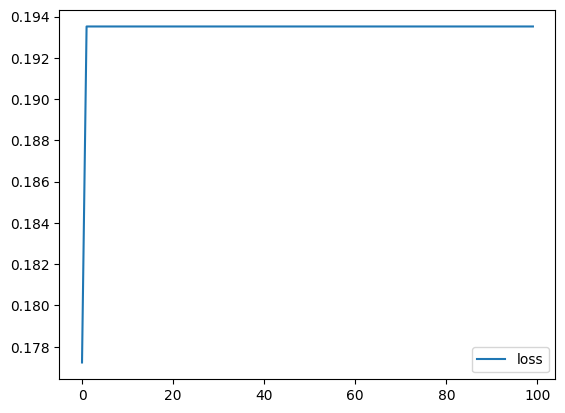

In [ ]:
pd.DataFrame(history.history).plot()

그래프가 반대로 나온다.

#### 5차모델
- 4층 신경망
- 가중치 13->26->52->26->1
- relu함수
- 학습률 0.05
- 학습 횟수 800회
- 배치 사이즈 25

In [ ]:
lr = 0.05
opt = tf.keras.optimizers.SGD(learning_rate=lr)
model = Model()
model.compile(optimizer=opt, loss=loss)
history = model.fit(inputs_scaled, targets_scaled, epochs=800, batch_size=25)

Epoch 1/800
19/19 [==============================] - 1s 2ms/step - loss: 0.1796
Epoch 2/800
19/19 [==============================] - 0s 2ms/step - loss: 0.0304
Epoch 3/800
19/19 [==============================] - 0s 2ms/step - loss: 0.0274
Epoch 4/800
19/19 [==============================] - 0s 2ms/step - loss: 0.0256
Epoch 5/800
19/19 [==============================] - 0s 2ms/step - loss: 0.0243
Epoch 6/800
19/19 [==============================] - 0s 3ms/step - loss: 0.0233
Epoch 7/800
19/19 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 8/800
19/19 [==============================] - 0s 3ms/step - loss: 0.0210
Epoch 9/800
19/19 [==============================] - 0s 2ms/step - loss: 0.0203
Epoch 10/800
19/19 [==============================] - 0s 3ms/step - loss: 0.0198
Epoch 11/800
19/19 [==============================] - 0s 2ms/step - loss: 0.0190
Epoch 12/800
19/19 [==============================] - 0s 3ms/step - loss: 0.0183
Epoch 13/800
19/19 [=================

<Axes: >

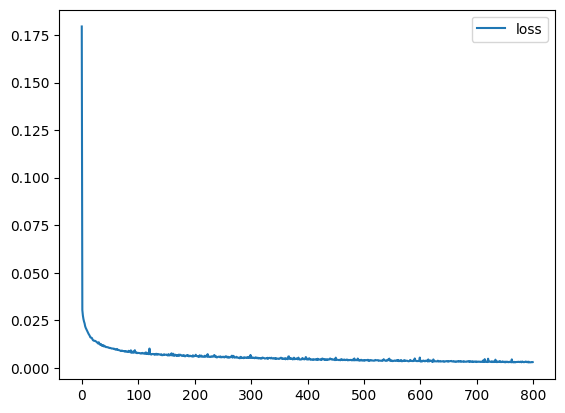

In [ ]:
pd.DataFrame(history.history).plot()